## Machine Learning -> Clasificación

### Titanic

La data de este NoteBook se obtuvo de Kaggle:
https://www.kaggle.com/c/titanic/data
Realizando una union entre la Data de Train y Test

In [1]:
'''Importar librerias basicas de trabajo'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Importo el Dataset'''
data = pd.read_csv('titanic.csv')

In [3]:
'''Exploracion rapida del la informacion '''
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
'''Checar la presencia de valores nulos'''
print('Porcetaje de valores nulos')
data.isnull().sum()/ data.shape[0] * 100

Porcetaje de valores nulos


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Ya que existe informacion que no es indispensable, elimino dicha informacion. Con el fin de contar con la data adecuada para los modelos de Machine Learning

Columnas a eliminar :
- PassengerId : Proporciona el Id del pasajero que el sistema le asigno, por lo que este Id, no es indispensable
- Name        : El nombre el pasajero no es una variable que influye en la supervivencia del accidente
- SibSp       : Proporciona el numero de hermanos abordo, de igual manera, por lo que esto no influye en la supervivencia individual del pasajero
- Parch       : Proporciona el numero de niños abordo relacionados con el pasajero, no influye en la supervivencia
- Ticket      : El numero de ticket, un tipo de numero de serie del boleto, por lo que si este numero es de los primero o ultimos , este no afectara en nada a la supervivencia.
- Fare        : Tarifa del pasajero, no influye en nada.
- Cabin       : Numeracion de la cabina donde se alojaba el pasajero, no influye
- Embarked    : Localidad en donde realizo el embarque, este no tiene representacion en la supervivencia

In [5]:
data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [6]:
data.head(2)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0


In [7]:
'''Checar la presencia de valores nulos'''
print('Porcetaje de valores nulos')
data.isnull().sum()/ data.shape[0] * 100

Porcetaje de valores nulos


Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
dtype: float64

Ya que cuento con un porcentaje considerable de datos nulos en la variable `Age`, opto por completar estos datos con el promedio de Edad segun el tipo de Clase.
Para esto empleo una copia del DataSet filtrado en donde realizo una limpieza de Outliers para evitar tener valor de edad fuera del rango e imputar con valores erroneos.

In [8]:
data_copy = data.copy()

In [9]:
'''Elimino valores nulos de mi Dataset copia'''
data_copy.dropna(inplace=True)

In [10]:
'''Reseteo el Index'''
data_copy.reset_index(inplace=True)

Text(0.5, 1.0, 'Presencia de Outliers "Age"')

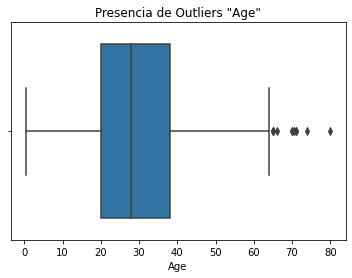

In [11]:
'''Checo la presencia de Outliers'''
sns.boxplot(data_copy['Age'])
plt.title('Presencia de Outliers "Age"')

In [12]:
antes_limpieza = data_copy.shape[0]

In [13]:
'''Limpieza de outliers'''
def limpiar_dataframe(dataframe, columna):
    q25, q75 = np.percentile(dataframe[columna], [25, 75])
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [14]:
data_copy = limpiar_dataframe(data_copy, 'Age')

In [15]:
despues_limpieza = data_copy.shape[0]
print('Numero de datos  antes de limpar Otliers: {}'.format(antes_limpieza))
print('Numero de datos  antes de limpar Otliers: {}'.format(despues_limpieza))

Numero de datos  antes de limpar Otliers: 714
Numero de datos  antes de limpar Otliers: 703


In [16]:
'''Obtengo el promedio de edad segun el tipo de clases'''
age_mean = data_copy.groupby('Pclass')['Age'].mean().round(0)

In [17]:
'''Convieto a diccionario'''
age_mean = dict(round(age_mean))

Una vez que obtengo el promedio de edad segun la clase del barco, aplico estos datos para realizar la imputacion de valores faltantes sobre mi DataSet de Trabajo

In [18]:
'''Imputo sobre mis Data de Trabajo'''
data['Age'] = data['Age'].fillna(data.Pclass.map(age_mean))

In [19]:
'''Corroboro la no existencia de valores nulos'''
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [20]:
data.head(2)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0


Ya que cuento con variables categoricas, como es el caso de `Sex`, realizo su encoding para convertir a numerica su informacion

In [21]:
'''Creacion de nuevas columnas binarias para Sex'''
sex_get = pd.get_dummies(data['Sex'])

In [22]:
'''Visualizo la salida obtenida'''
sex_get.head(2)

,female,male
0,0,1
1,1,0


In [23]:
'''Union de Data'''
data = pd.concat([data,sex_get], axis=1)

In [24]:
'''Elimino la columna categorica'''
data.drop(['Sex'], axis=1, inplace=True)

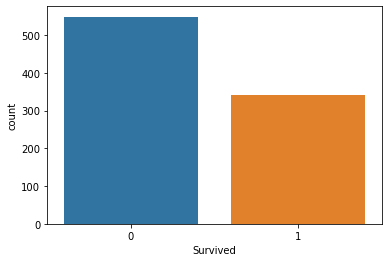

In [25]:
'''Balanceo de datos'''
sns.countplot(data['Survived'])

In [26]:
sobrevivientes = data[data['Survived'] == 1]
muertos = data[data['Survived'] == 0 ]
print('Sobrevivientes:{}\nNO sobrevivientes:{}'.format(len(sobrevivientes), len(muertos)))

Sobrevivientes:342
NO sobrevivientes:549


Ya que mi Dataset se encuentra desbalanceado, esto posiblemente afecte las predicciones del modelo, ya que la tendencia es que las personas no sobrevivan. Por lo cual balanceo los Datos para que el modelo cuente con una datos balanceados y la probalidad ahora sea del 50% y emplee las variables para tomar esa decision.

Para esto obtengo el total de personas Sobrevivientes, ya que estas representan la minoria, y empleo este total para tomar una muestra al azar de la data de las personas no sobrevivientes.

In [27]:
'''Muestra aleatoria igualando el total de sobrevivientes '''
muestra = np.random.randint(len(muertos), size=342)

In [28]:
'''Filtrado de personas seleccionadas al azar'''
no_sobrevivientes = muertos.iloc[muestra]

In [29]:
sobrevivientes.shape, no_sobrevivientes.shape

((342, 5), (342, 5))

In [30]:
'''Reseteo el Index'''
sobrevivientes.reset_index(inplace=True)
no_sobrevivientes.reset_index(inplace=True)

In [45]:
data_balanceada = pd.concat([sobrevivientes, no_sobrevivientes])

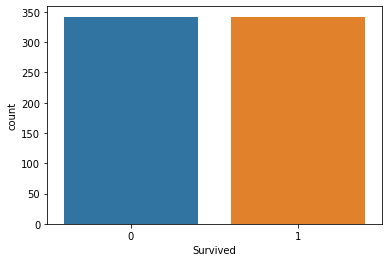

In [32]:
sns.countplot(data_balanceada['Survived'])

In [47]:
data_balanceada.drop(['index'],axis=1, inplace=True)

In [48]:
X = data_balanceada.drop(['Survived'], axis=1)
y = data_balanceada['Survived']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,)

# DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
'''Defino modelo'''
arbol = DecisionTreeClassifier()

In [52]:
'''Entreno el arbol'''
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
'''Evaluo el desempeño del arbol empleando datos de Test'''
arbol.score(X_test, y_test)

0.7719298245614035

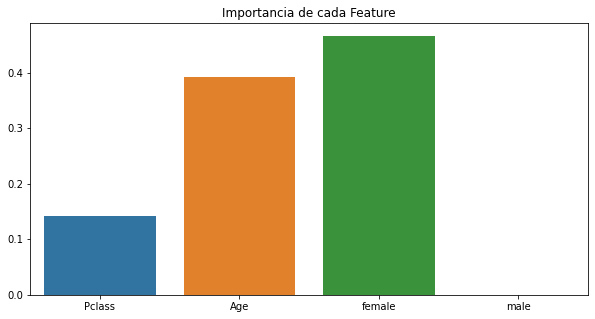

In [54]:
importances = arbol.feature_importances_
columns = X.columns
plt.figure(figsize=(10,5))
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

# Optimizacion de sus hiperparametros


In [55]:
from sklearn.model_selection import GridSearchCV

In [60]:
parametros = {  'criterion' :['gini', 'entropy'],
                'splitter'  : ['best', 'random'],
                'max_depth' : np.arange(1,50,3),
                'max_features' : ['auto', 'sqrt', 'log2'],
             'random_state'  : np.arange(1,50,5)}

In [61]:
model = GridSearchCV(arbol, param_grid=parametros, cv=5)

In [62]:
model.fit(X_train,y_train)

KeyboardInterrupt: 